# AdaBoost classifier.
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.
#### Algorithm :
1. First step is to give weight to each observation **we give same weight at the initial state**.Afterwards the weights wil be updated leading to unequal weights.<br>
<code>weight =1/n </code> => n=no. of observations
2. Next step is to create a stump (a tree with only one split).This supm is created with feature which gives the **hishest info. gain** outoff all the features.
3. Next we classifiy the observations based on that stump and note the output.
4. Now calculate the total error<br><code>sum(all missclassified outputs)</code>.
5. Next calculate **performance say** :<br>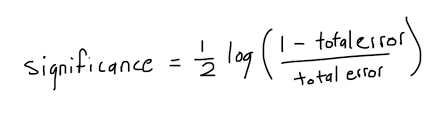
6. Then we update the weights of each observation using formula :<br><code>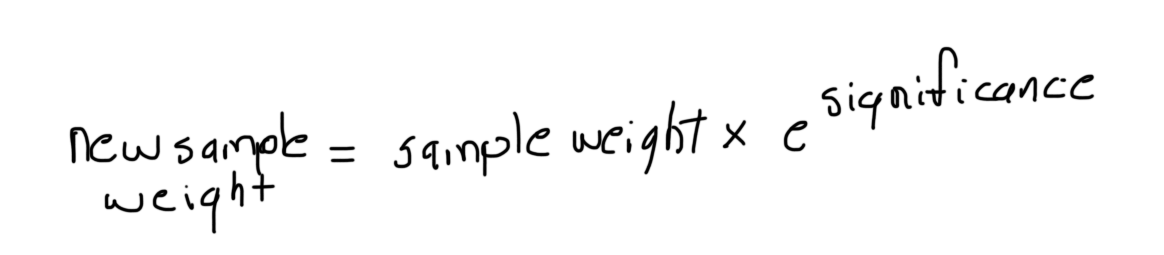</code>.
**Here significance(performance say) value is +ve for missclassified observations and -ve for correctly classified** i.e. we are increasing missclassified values weight and simultaneously decreasing correctly classified value's weight.<br><br>
7. Next step is to regularize weight by **dividing each weight by total sum of weights**
8. Next we create range buckets starting from **0 to first weight(updated)** then from **first weight -to- (first+second weight)** then **(first+second weight) to (first+second+third weight)** and so on till last.
9. This busket helps us to select the observations having more weight for next model.As we select a number randomly from range (0,1).So observation with more weight will have wider range in bucket we created . So more times it will be selected.As random selection happens n times (n=no. of observations).
10. Now we train the next model (decision tree) and again calculate sum of missclassified values and calculate total error,performance say and update the weights.This goes on for predefined number of times (i.e. how many Decision trees we have specified).
11. **Final Step** is to use voting system to decide the output i.e. foe a observation if 2 models classifiy as 0 and 3 classify as 1 the we have majority for "1" so final output is 1.Thsi is called combinig weak learners to form a strong one.
**Below is the image for multiple models i.e. weak learners combined to form strong learners.**
    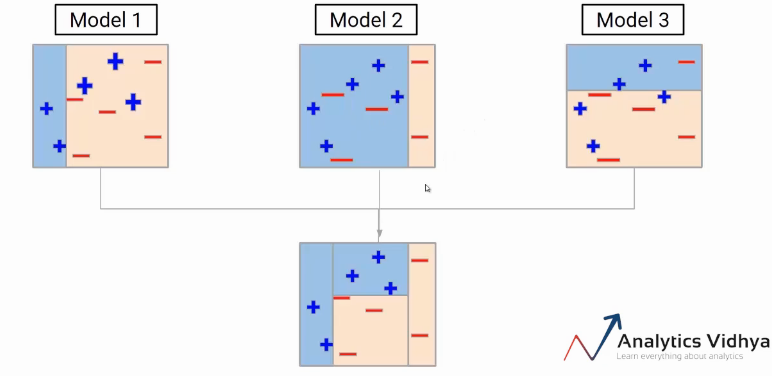

## Classifier

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data=data[['Survived', 'Pclass','Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked']]
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
data.Age.fillna(data.Age.median(),inplace=True)
data.Cabin.fillna('Missing',inplace=True)
data['Cabin_init']=data.Cabin.apply(lambda x:x[0])
data.head()
                  

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_init
0,0,3,male,22.0,1,0,7.2500,Missing,S,M
1,1,1,female,38.0,1,0,71.2833,C85,C,C
2,1,3,female,26.0,0,0,7.9250,Missing,S,M
3,1,1,female,35.0,1,0,53.1000,C123,S,C
4,0,3,male,35.0,0,0,8.0500,Missing,S,M


In [6]:
data.dropna(inplace=True)
data.drop('Cabin',inplace=True,axis=1)
data=pd.get_dummies(data)
data.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
Cabin_init_A    0
Cabin_init_B    0
Cabin_init_C    0
Cabin_init_D    0
Cabin_init_E    0
Cabin_init_F    0
Cabin_init_G    0
Cabin_init_M    0
Cabin_init_T    0
dtype: int64

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [8]:
from sklearn.model_selection import train_test_split
x=data.iloc[:,1:]
y=data['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
dt=DecisionTreeClassifier()
clf=AdaBoostClassifier(n_estimators=100,base_estimator=dt)
clf.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [9]:
y_pred=clf.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78       109
           1       0.65      0.80      0.71        69

    accuracy                           0.75       178
   macro avg       0.75      0.76      0.75       178
weighted avg       0.77      0.75      0.76       178



In [10]:
confusion_matrix(y_test,y_pred)

array([[79, 30],
       [14, 55]], dtype=int64)

In [11]:
data.shape

(889, 20)

In [12]:
x_train.shape

(711, 19)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7528089887640449

## Regressor 

In [14]:
data1=pd.read_csv('C:/Users/vikash arya/datascience/datascience_krishnaik/data_sets/mercedes_train.csv')
data1.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [15]:
sum([i for i in data1.isnull().sum() if i==0])

0

In [16]:
data1.drop('ID',axis=1,inplace=True)

In [17]:

x=data1.drop('y',axis=1)
y=data1.y
l=[]
for i in x.columns:
    if x[i].dtypes!='object' and x[i].std()<=0.05 :
        l.append(i)
x.drop(l,axis=1,inplace=True)
x.shape

(4209, 297)

In [18]:
x.head()

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,...,X371,X373,X374,X375,X376,X377,X378,X379,X380,X382
0,k,v,at,a,d,u,j,o,0,0,...,0,0,0,0,0,1,0,0,0,0
1,k,t,av,e,d,y,l,o,0,0,...,0,0,0,1,0,0,0,0,0,0
2,az,w,n,c,d,x,j,x,0,0,...,0,0,0,0,0,0,0,0,0,1
3,az,t,n,f,d,x,l,e,0,0,...,0,0,0,0,0,0,0,0,0,0
4,az,v,n,f,d,h,d,n,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

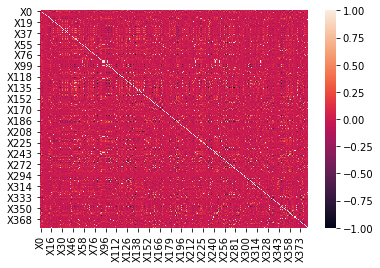

In [19]:
from sklearn.model_selection import train_test_split as tts
import seaborn as sns
import scipy
corr=scipy.stats.spearmanr(x)
n_corr=pd.DataFrame(corr[0],index=x.columns,columns=x.columns)
n_corr

import matplotlib.pyplot as plt

sns.heatmap(n_corr)

In [20]:
cl=set()
for i in range(len(n_corr.columns)):
    for j in range(i):
        if abs(n_corr.iloc[i,j])>=0.5:
            cl.add(n_corr.columns[i])
len(cl)

189

In [21]:
x.drop(cl,axis=1,inplace=True)
x.shape

(4209, 108)

In [22]:
x.X0.unique()

array(['k', 'az', 't', 'al', 'o', 'w', 'j', 'h', 's', 'n', 'ay', 'f', 'x',
       'y', 'aj', 'ak', 'am', 'z', 'q', 'at', 'ap', 'v', 'af', 'a', 'e',
       'ai', 'd', 'aq', 'c', 'aa', 'ba', 'as', 'i', 'r', 'b', 'ax', 'bc',
       'u', 'ad', 'au', 'm', 'l', 'aw', 'ao', 'ac', 'g', 'ab'],
      dtype=object)

In [23]:
def topcateg(data,col):
    top=data[col].value_counts().sort_values(ascending=False).head(10).index
    for i in top:
        data[i]=np.where(data[col]==i,1,0)
    data.drop(col,axis=1,inplace=True)
        

for i in x.columns:
    if x[i].dtypes=='object':
        topcateg(x,i)
x.head()

,X10,X12,X13,X14,X16,X17,X18,X19,X22,X23,...,ai,m,e,d,g,q,p,j,h,k
0,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [24]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.2,random_state=42)
reg=AdaBoostRegressor(n_estimators=100,base_estimator=LinearRegression(),learning_rate=0.01)
reg.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=0.01,
                  n_estimators=100)

In [25]:
reg.score(x_test,y_test)

0.48937815792971373